In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
pamella = pd.read_csv('pamella.csv')

In [3]:
pamella.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
pamella

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [5]:
numerical = pamella.select_dtypes(include=np.number)

In [6]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [7]:
categoricals = pamella.select_dtypes(include=object)

In [8]:
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,IW72280,California,No,Basic,Doctor,2011-02-14,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,No,Basic,College,2011-01-07,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
9130,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
9131,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
9132,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


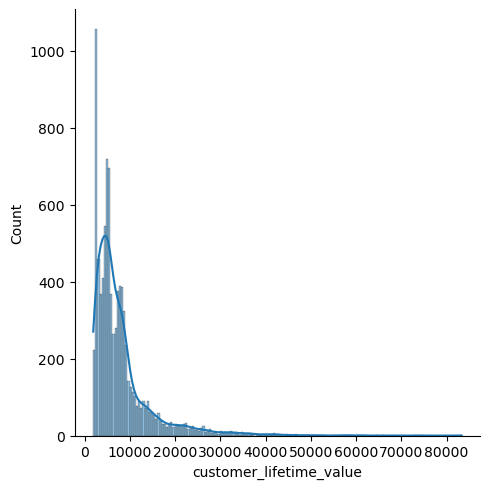

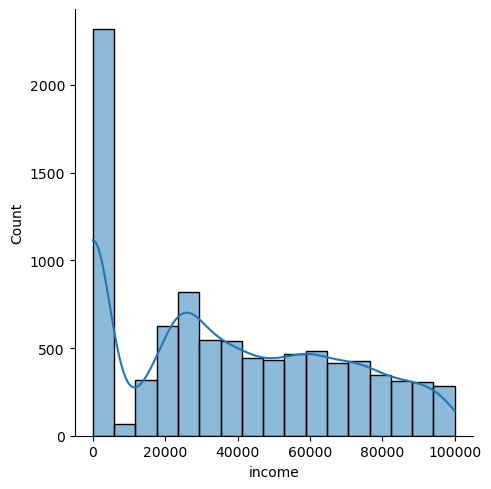

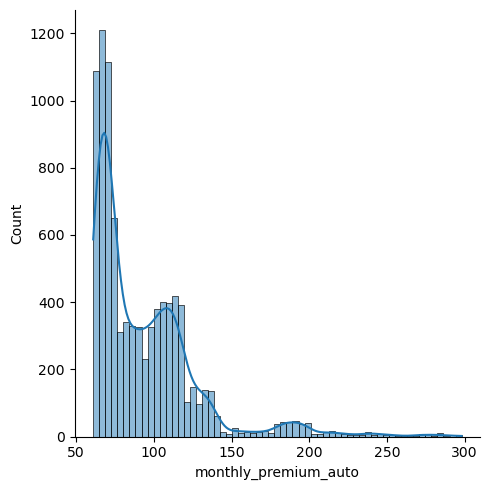

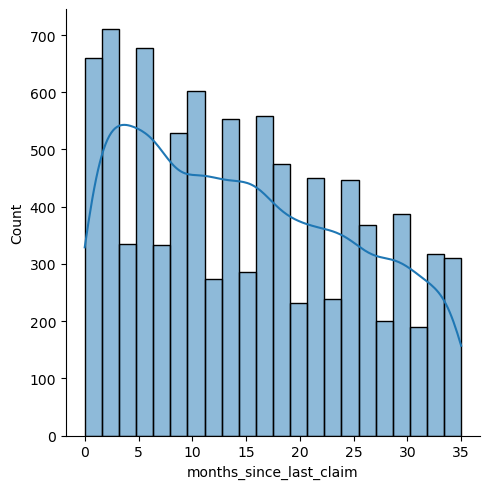

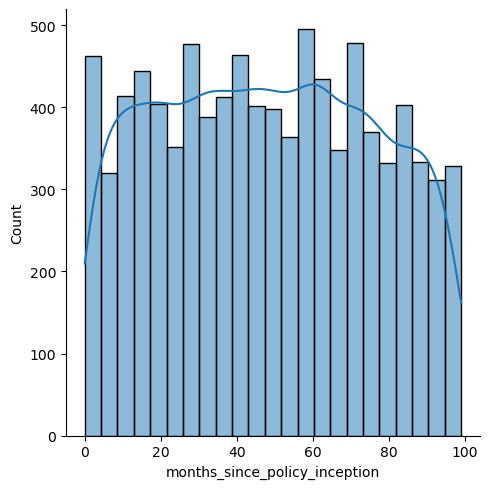

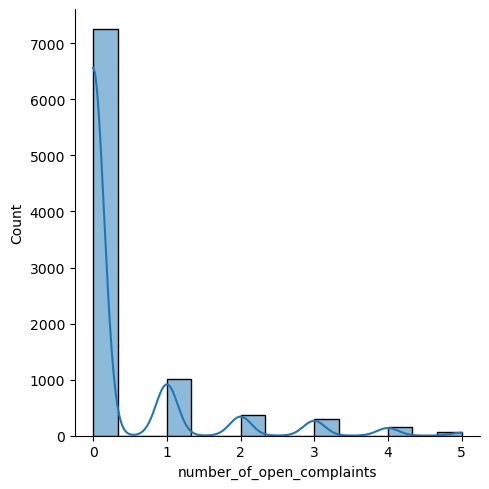

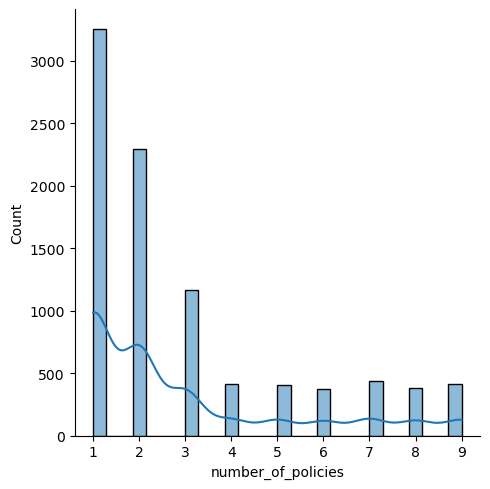

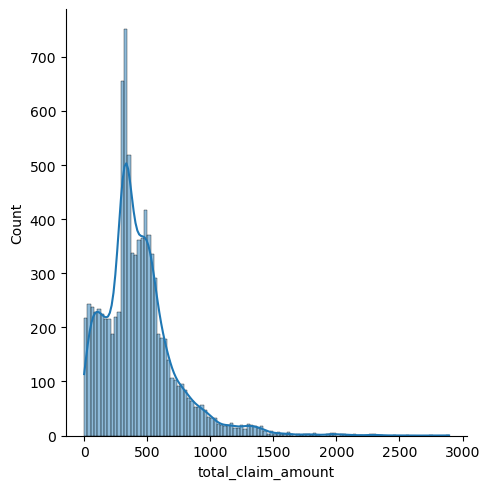

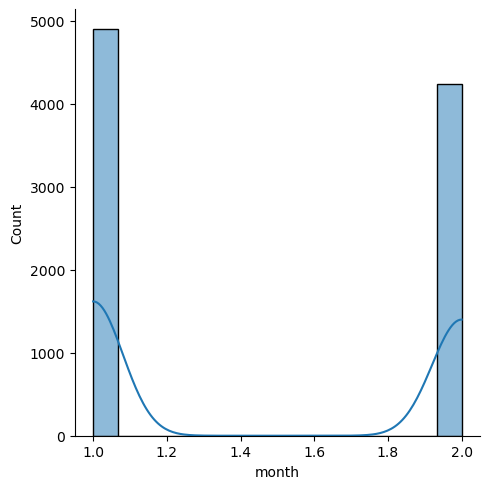

In [9]:
for col in numerical:
    sns.displot(data=numerical, x=col, kde=True)

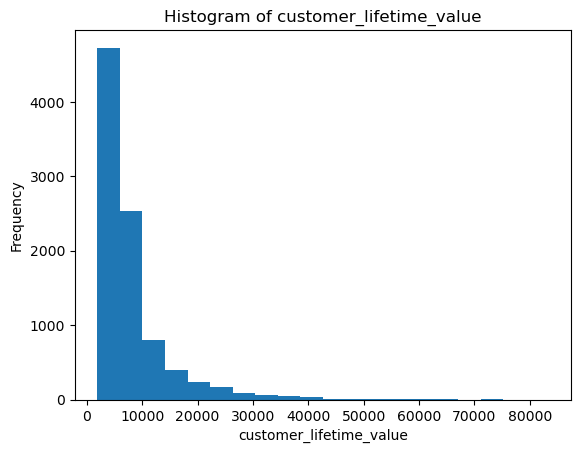

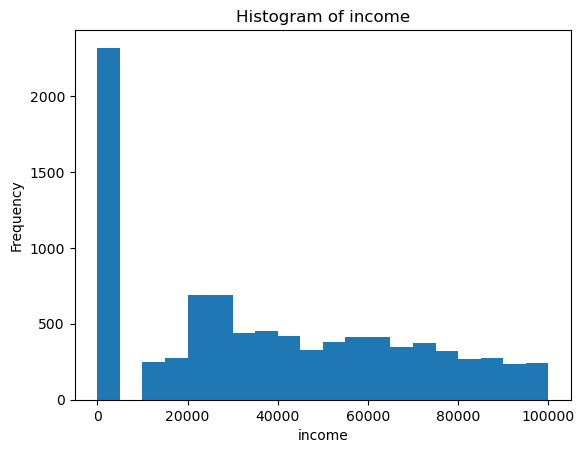

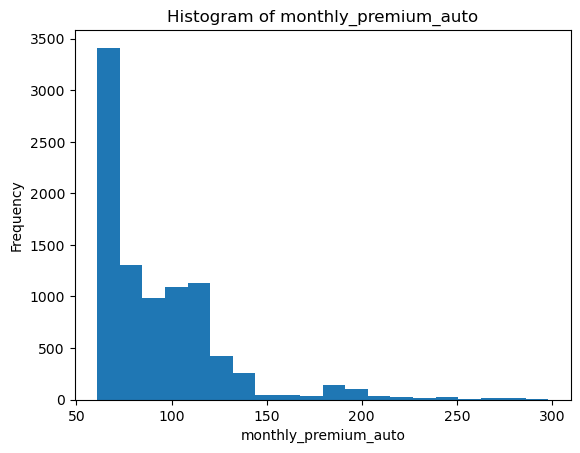

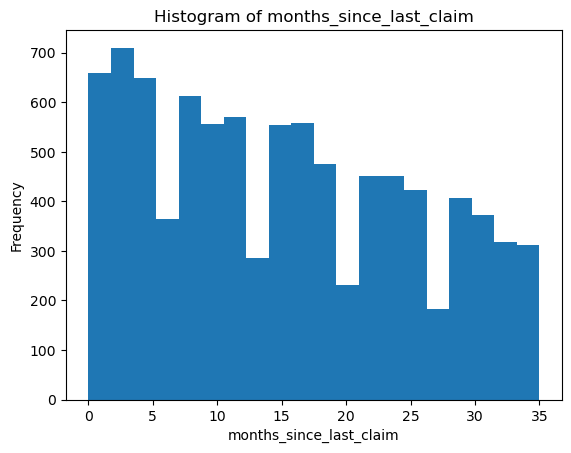

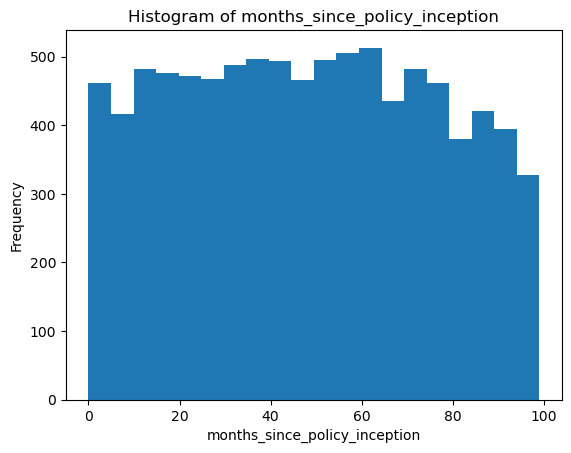

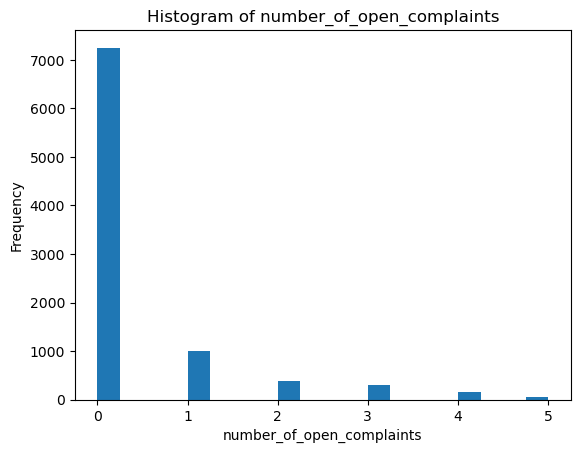

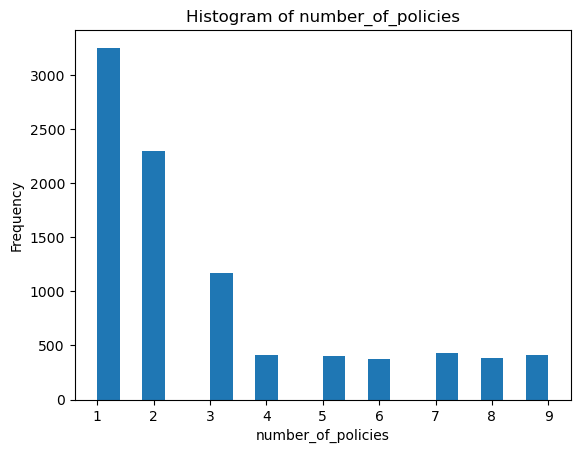

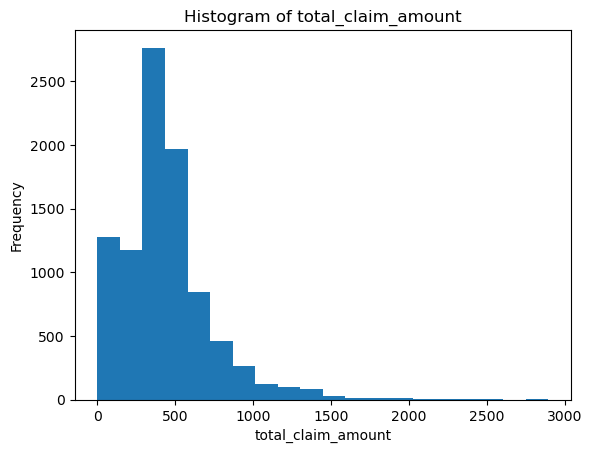

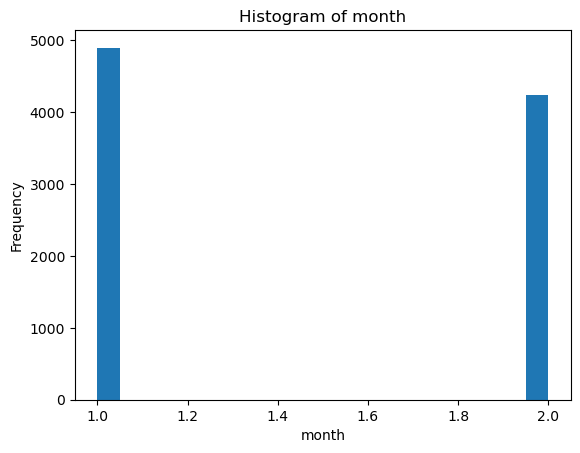

In [10]:
for col in numerical:
    plt.hist(numerical[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

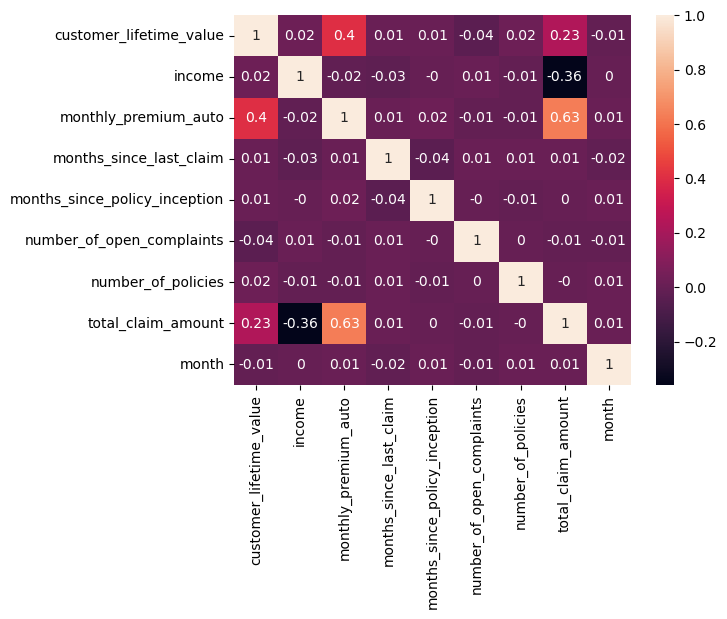

In [11]:
corr_round = numerical.corr().round(decimals=2)

sns.heatmap(corr_round, annot=True)
plt.show()

In [13]:
correl = numerical.corr()

cols_to_drop=[]
#c=0
for i in range(len(correl.columns)):
    for j in range(len(correl)):
        if correl.iloc[i,j] == 1.0:
            pass
        elif correl.iloc[i,j]>0.9:
         #   c=c+1
            cols_to_drop.append(correl.columns[i])
            
if not cols_to_drop:
    print("There are no high-correlation columns.")
else:
    numeric_data2 = numeric_data.drop(columns=cols_to_drop)
    print("The following high-correlation columns were dropped: ",cols_to_drop)
    print("""""")  #paragraph
    print("New numerical data: ")
    display(numeric_data2)

There are no high-correlation columns.
